## **Proyeto 1 2023-Diciembre.**
Este proyecto corresponde al segundo proyecto del curso de Deep learning,de la

maestría en estadística de la universidad EL BOSQUE:

---
> Fecha de entrega⏰:**Viernes 15 de diciembre 2023 hora:11:50 p.m**.


---
> **Calificación:** Para calificar esta actividad se tendrá en cuenta:

 - Se mirará si entiende bien el problema que se desea resolver con los datos.
 - El preprocesado.
 - Definición correcta de la red.
 - Compilado correcto(se mirará el optimizador, metrica usada,y la función de perida)
 - Entrenamiento correcto.
 - Se mirará que cada paso que se le pide se haya realizado.
 - Se le pide que con este conjunto de datos, implemente una red neuronal convolucional, usando la temática que se vío la última clase.
 Se le pide que encuentre una configuración que le arroje un buen acurracy(90% en adelante será aceptado.)
_________________________________________________________________________





---
> Nombre y Apellido:
---

# **Problema y datos a utilizar**
- Explicar aquí el tipo de problema que desea resolver(es decir si es un problema de regresión, clasificación binaria o clasificación multiclase.).


- Explicar sobre que se trata su conjunto de datos. Que tipo de datos contiene, cual es su respues.Se recomienda realizar una buena explicación de sus datos.



----
El conjunto de datos que vamos utilizar se llama **Fashion-MNIST.**, este conjunto de datos se encuentra dentro de keras.
Para usar debe llamarlos con el código:
          
           from tensorflow.keras.datasets import fashion_mnist
  
  Para cargarlos, y dividir en entrenamineto y prueba debe usar el código:

           (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


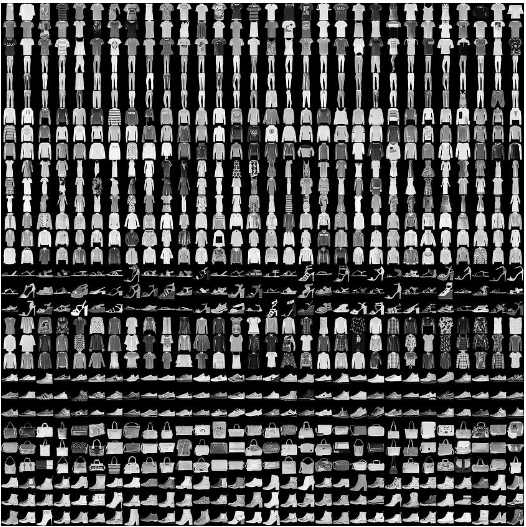

______________________________________________________________________



---

# **Cargar las librerías necesarias.**
---

In [12]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import keras


---

# **Cargar los datos.**
---

In [14]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


---
# **Exploración y preprocesado de datos.**

**Ayuda:**
- Observe sus datos, muestre una imagen y demás.
- Recuerde: Transformar su variable respuesta Y.

- Recuerde: Transformar su variables o características X.
---

In [17]:
list_1 = [X_train, y_train, X_test, y_test]
list_11 = ['X_train', 'y_train', 'X_test', 'y_test']
for i in range(len(list_1)):
  print(f'{list_11[i]} shape {list_1[i].shape}')

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


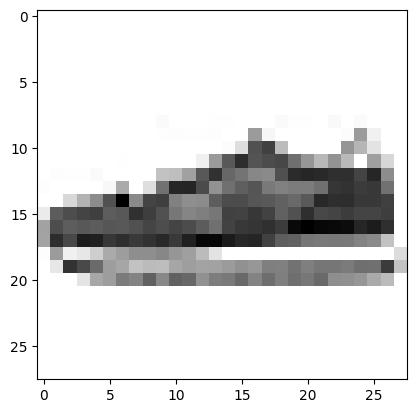

In [25]:
plt.imshow(x_train[46], cmap = 'binary')
plt.show()

Luego de consultar información acerca del conjunto de datos "fashion_mnist" se encontró que contiene 70.000 imágenes, dividas en un conjunto de entrenamiento con 60mil registros fotgráficos y el restante conforma el conjunto de prueba.

Dentro del total de imágenes se puede encontrar diez diferentes prendas de vestir como zapatos, camisas, vestidos... con lo cual, el modelo debe clasificar a cada imagen de acuerdo al tipo de artículo

In [44]:
from keras.utils import to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train, 10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, 10)
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Luego de tener la variable de respuesta condicionada a la respuesta que se espera obtener, se debe configurar la variable de entrada, es decir, hacer un reshape a los conjuntos X_train y X_test, esto se debe hacer en función de la dimensión de las imágenes (28x28) y el número de registros por conjunto

In [46]:
X_train_reshaped = np.reshape(X_train, (60000, 784))
X_test_reshaped = np.reshape(X_test, (10000, 784))
list_2 = [X_train_reshaped, X_test_reshaped]
list_22 = ['X_train_reshaped', 'X_test_reshaped']
for i in range(len(list_2)):
  print(f'{list_22[i]} shape {list_2[i].shape}')

X_train_reshaped shape (60000, 784)
X_test_reshaped shape (10000, 784)


Luego de redimensionar las variables de entrada se procede a realizar normalización, estandarización con el fin de encontrar mejores métricas de desempeño evaluando cada uno de los procesos

In [45]:
standard = StandardScaler()
X_train_standard = standard.fit_transform(X_train_reshaped)
X_test_standard = standard.transform(X_test_reshaped)

In [56]:
x_mean = np.mean(X_train_reshaped)
x_std = np.mean(X_train_reshaped)
e = 1e-12

X_train_norm = (X_train_reshaped - x_mean)/(x_std + e)
X_test_norm =  (X_test_reshaped - x_mean)/(x_std + e)

---
# **Definir el modelo de Red neuronal**
---

Dado que la definición de la red neuonal es independiente del conjunto de datos, se procede a definir la red que se utilizará tanto para los conjuntos estandarizados como normalizados

In [57]:
model_std = Sequential()
number_neurons = [16,32,64,128]
for neurons in range(len(number_neurons)):
  if neurons == 0:
    model_std.add(Dense(number_neurons[neurons], activation = 'relu', input_dim = 784))
  else:
    model_std.add(Dense(number_neurons[neurons], activation = 'relu'))
model_std.add(Dense(10, activation = 'softmax'))
model_std.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                12560     
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 24826 (96.98 KB)
Trainable params: 24826 (96.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
from tensorflow.keras.layers import Dropout

model_norm = Sequential()
number_neurons = [16, 32, 64, 128]

for neurons in range(len(number_neurons)):
    if neurons == 0:
        model_norm.add(Dense(number_neurons[neurons], activation='relu', input_dim=784))
    else:
        model_norm.add(Dense(number_neurons[neurons], activation='relu'))
        model_norm.add(Dropout(0.3))
model_norm.add(Dense(10, activation='softmax'))
model_norm.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 16)                12560     
                                                                 
 dense_30 (Dense)            (None, 32)                544       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)              

---
# **Compilar nuestra red**
---

In [99]:
model_norm.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historial_norm = model_norm.fit(X_train_norm, y_train_encoded, epochs = 20, validation_split = 0.3, shuffle=True)

Epoch 1/20
1313/1313 [==============================] - 10s 6ms/step - loss: 1.2603 - accuracy: 0.5406 - val_loss: 0.6166 - val_accuracy: 0.7684
Epoch 2/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.7549 - accuracy: 0.7251 - val_loss: 0.5389 - val_accuracy: 0.7882
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.6634 - accuracy: 0.7652 - val_loss: 0.4962 - val_accuracy: 0.8222
Epoch 4/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.6118 - accuracy: 0.7905 - val_loss: 0.4791 - val_accuracy: 0.8316
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5728 - accuracy: 0.8055 - val_loss: 0.4606 - val_accuracy: 0.8369
Epoch 6/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5481 - accuracy: 0.8137 - val_loss: 0.4450 - val_accuracy: 0.8454
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5269 - accuracy: 0.8221 - val_loss: 0.4319 - val_accuracy

In [84]:
model_std.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historial_std = model_std.fit(X_train_standard, y_train_encoded, epochs = 20, validation_split = 0.3, shuffle = True)

Epoch 1/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2043 - accuracy: 0.9253 - val_loss: 0.4246 - val_accuracy: 0.8707
Epoch 2/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2027 - accuracy: 0.9240 - val_loss: 0.4377 - val_accuracy: 0.8656
Epoch 3/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2017 - accuracy: 0.9258 - val_loss: 0.4331 - val_accuracy: 0.8664
Epoch 4/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2003 - accuracy: 0.9258 - val_loss: 0.4321 - val_accuracy: 0.8683
Epoch 5/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1995 - accuracy: 0.9260 - val_loss: 0.4498 - val_accuracy: 0.8656
Epoch 6/50
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1968 - accuracy: 0.9266 - val_loss: 0.4447 - val_accuracy: 0.8637
Epoch 7/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1947 - accuracy: 0.9283 - val_loss: 0.4509 - val_accuracy:

---
# **Entrenar aquí su red(ajustar)**

---



In [100]:
predic_std = model_std.predict(X_test_standard)
print('Shape of preds', predic_std.shape)

313/313 [==============================] - 1s 2ms/step
Shape of preds (10000, 10)


In [101]:
predic_norm = model_norm.predict(X_test_norm)
print('Shape of preds', predic_norm.shape)

313/313 [==============================] - 1s 2ms/step
Shape of preds (10000, 10)


---
# **Evaluar el modelo**
---

In [102]:
loss, accuracy = model_std.evaluate(X_test_standard, y_test_encoded)
print('Accuracy', round(accuracy, 3))
print('Loss', loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.6110 - accuracy: 0.8549
Accuracy 0.855
Loss 0.6109558343887329


In [103]:
loss, accuracy = model_norm.evaluate(X_test_norm, y_test_encoded)
print('Accuracy', round(accuracy, 3))
print('Loss', loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.4313 - accuracy: 0.8489
Accuracy 0.849
Loss 0.4312595725059509


---
# **Dibujar la Loss y el accuracy**
---

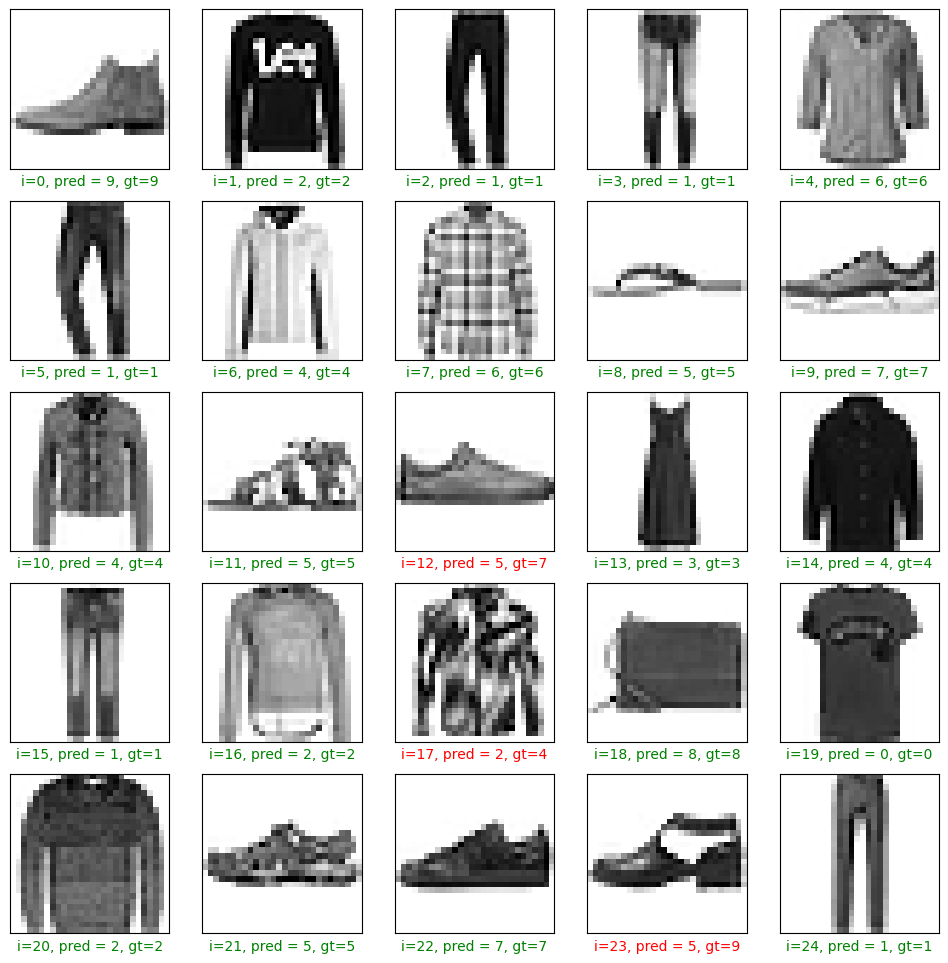

In [104]:
plt.figure(figsize = (12,12))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred1 = np.argmax(predic_std[i])

  gt = y_test[i]
  col = 'g'

  if pred1 != gt:
    col = 'r'

  plt.xlabel(f'i={i}, pred = {pred1}, gt={gt}', color = col)
  plt.imshow(X_test[i], cmap = 'binary')
plt.show()

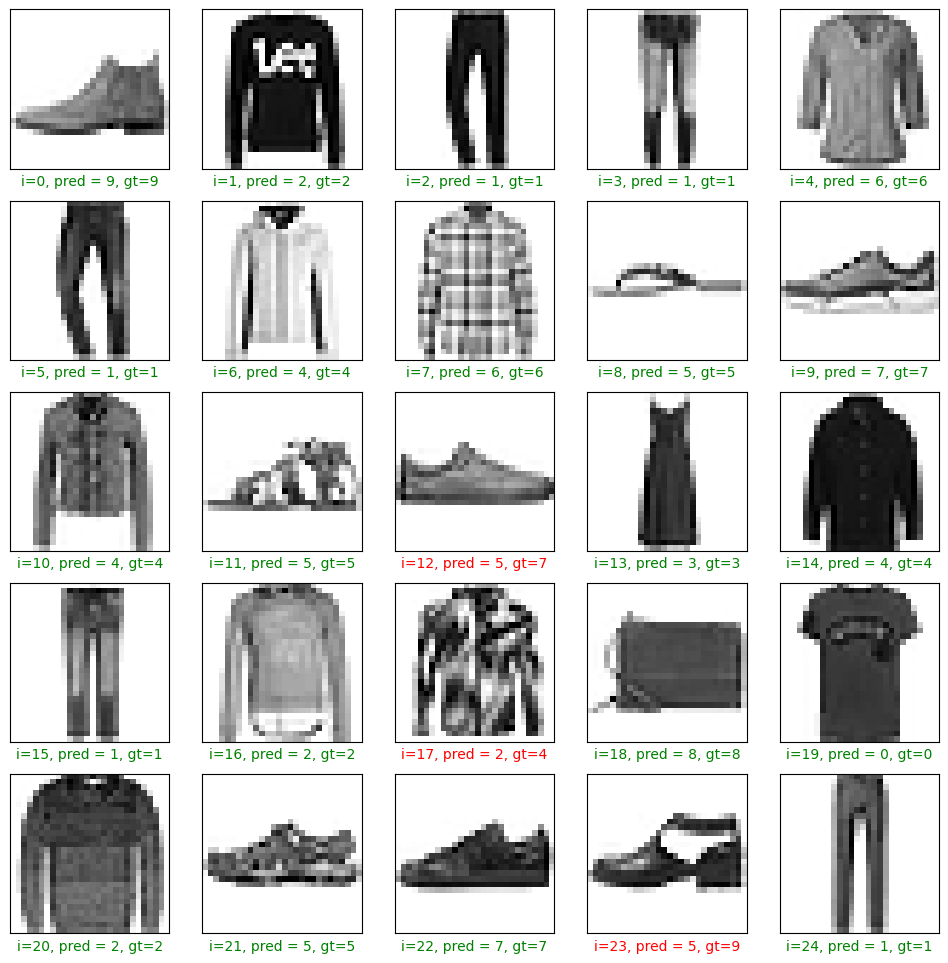

In [106]:
plt.figure(figsize = (12,12))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred1 = np.argmax(predic_norm[i])

  gt = y_test[i]
  col = 'g'

  if pred1 != gt:
    col = 'r'

  plt.xlabel(f'i={i}, pred = {pred1}, gt={gt}', color = col)
  plt.imshow(X_test[i], cmap = 'binary')
plt.show()

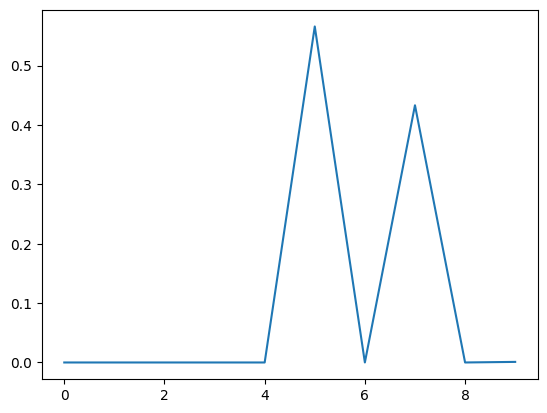

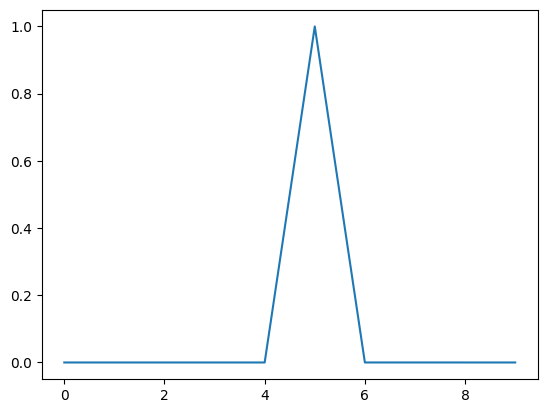

In [107]:
plt.plot(predic_norm[21])
plt.show()

plt.plot(predic_std[21])
plt.show()

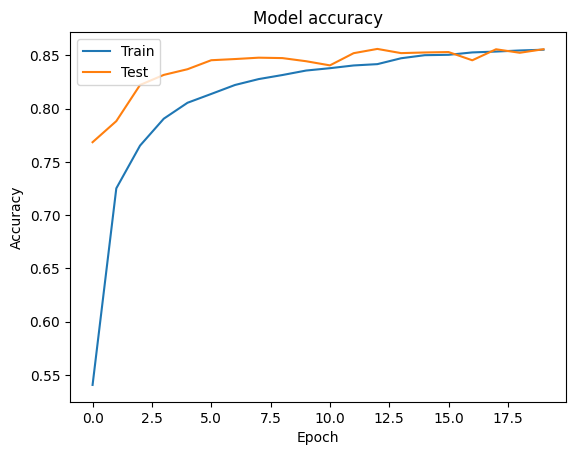

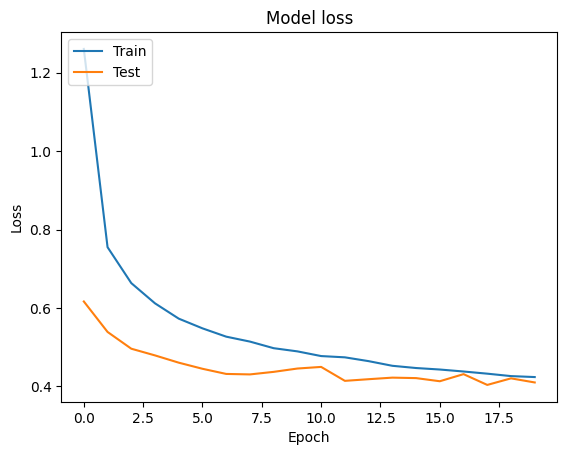

In [108]:
plt.plot(historial_norm.history['accuracy'])
plt.plot(historial_norm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

plt.plot(historial_norm.history['loss'])
plt.plot(historial_norm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

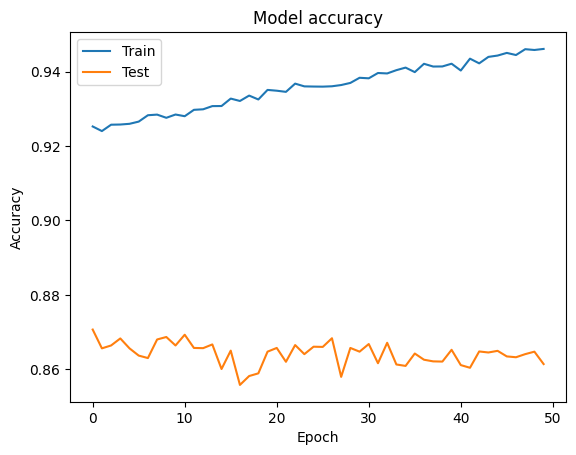

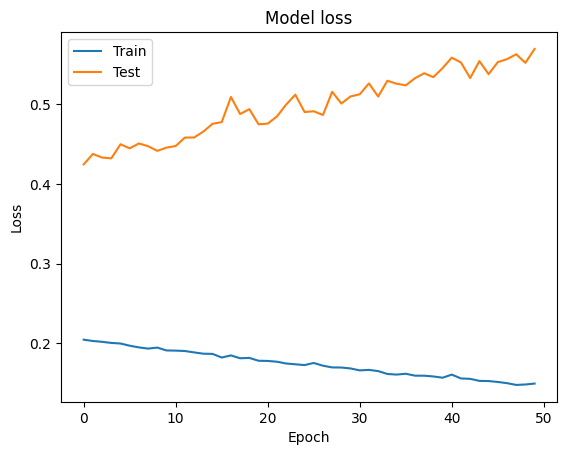

In [109]:
plt.plot(historial_std.history['accuracy'])
plt.plot(historial_std.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

plt.plot(historial_std.history['loss'])
plt.plot(historial_std.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()